In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
len(df['Car_Name'].unique())

98

In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        # Create a mapping dictionary for unique values in the column
        mapping_dict = {value: i for i, value in enumerate(df[col].unique())}
        # Map the values using the created dictionary
        df[col] = df[col].map(mapping_dict)

In [12]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
7,6,2015,6.50,8.61,33429,1,0,0,0
215,93,2012,4.50,9.40,36100,0,0,0,0
199,74,2007,0.12,0.58,53000,0,1,0,0
218,93,2014,6.45,8.40,45078,0,0,0,0
248,88,2013,4.00,4.60,30000,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


In [14]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.duplicated().sum()

2

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# Handling outliers
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['Selling_Price'] >= lower_bound) & (df['Selling_Price'] <= upper_bound)]


In [18]:
Q1 = df['Present_Price'].quantile(0.25)
Q3 = df['Present_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['Present_Price'] >= lower_bound) & (df['Present_Price'] <= upper_bound)]


In [19]:
df.describe()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,54.050000,2013.603571,3.694393,5.993357,35695.364286,0.175000,0.371429,0.085714,0.035714
std,34.678725,2.871811,3.060164,4.816754,38469.279821,0.399036,0.484052,0.280443,0.185909
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,18.750000,2012.000000,0.750000,0.990000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,2014.000000,3.250000,5.800000,31515.500000,0.000000,0.000000,0.000000,0.000000
75%,90.000000,2016.000000,5.500000,9.400000,46779.500000,0.000000,1.000000,0.000000,0.000000
max,97.000000,2018.000000,12.900000,20.450000,500000.000000,2.000000,1.000000,1.000000,1.000000


In [20]:

current_year = 2023  # Update with the current year
df['Car_Age'] = current_year - df['Year']


In [21]:

df = df.drop('Year', axis=1)

df = df.drop('Car_Name', axis=1)

In [22]:

df['Annual_Mileage'] = df['Driven_kms'] / df['Car_Age']


In [23]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age,Annual_Mileage
0,3.35,5.59,27000,0,0,0,0,9,3000.000000
1,4.75,9.54,43000,1,0,0,0,10,4300.000000
2,7.25,9.85,6900,0,0,0,0,6,1150.000000
3,2.85,4.15,5200,0,0,0,0,12,433.333333
4,4.60,6.87,42450,1,0,0,0,9,4716.666667


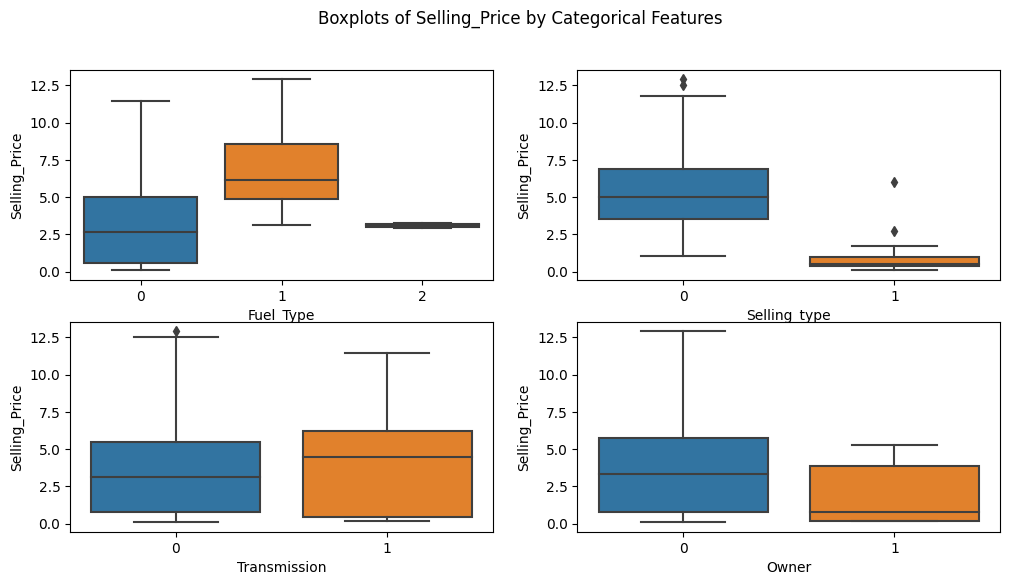

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="Fuel_Type", y="Selling_Price")
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="Selling_type", y="Selling_Price")
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="Transmission", y="Selling_Price")
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="Owner", y="Selling_Price")
plt.suptitle("Boxplots of Selling_Price by Categorical Features")
plt.show()

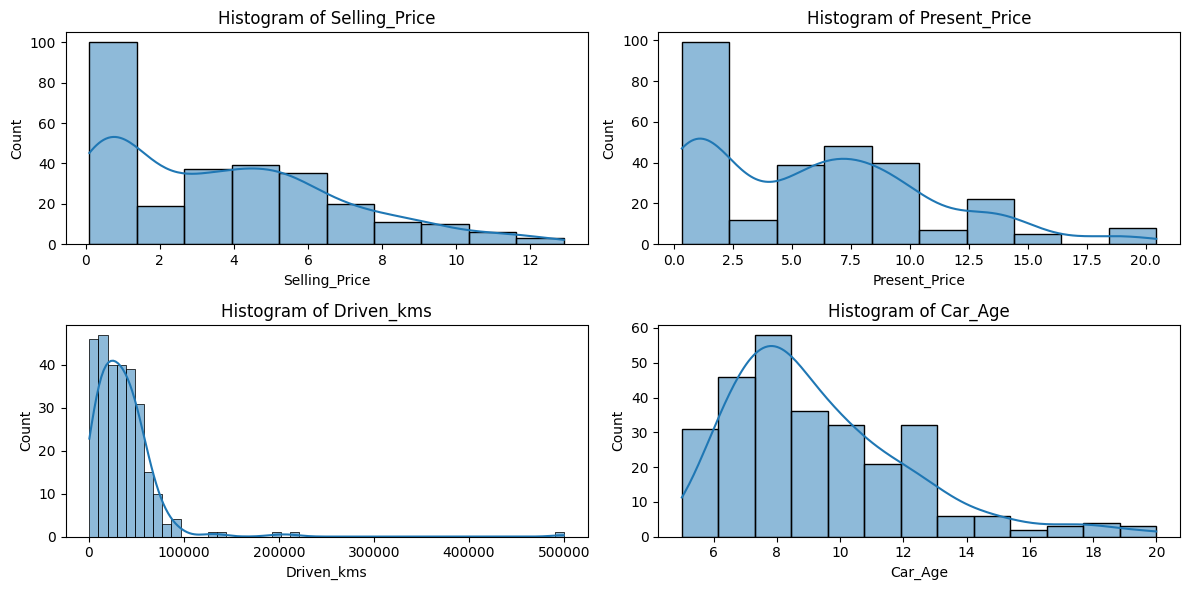

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Histogram of Selling_Price")
plt.xlabel("Selling_Price")
plt.subplot(2, 2, 2)
sns.histplot(df['Present_Price'], kde=True)
plt.title("Histogram of Present_Price")
plt.xlabel("Present_Price")
plt.subplot(2, 2, 3)
sns.histplot(df['Driven_kms'], kde=True)
plt.title("Histogram of Driven_kms")
plt.xlabel("Driven_kms")
plt.subplot(2, 2, 4)
sns.histplot(df['Car_Age'], kde=True)
plt.title("Histogram of Car_Age")
plt.xlabel("Car_Age")
plt.tight_layout()
plt.show()

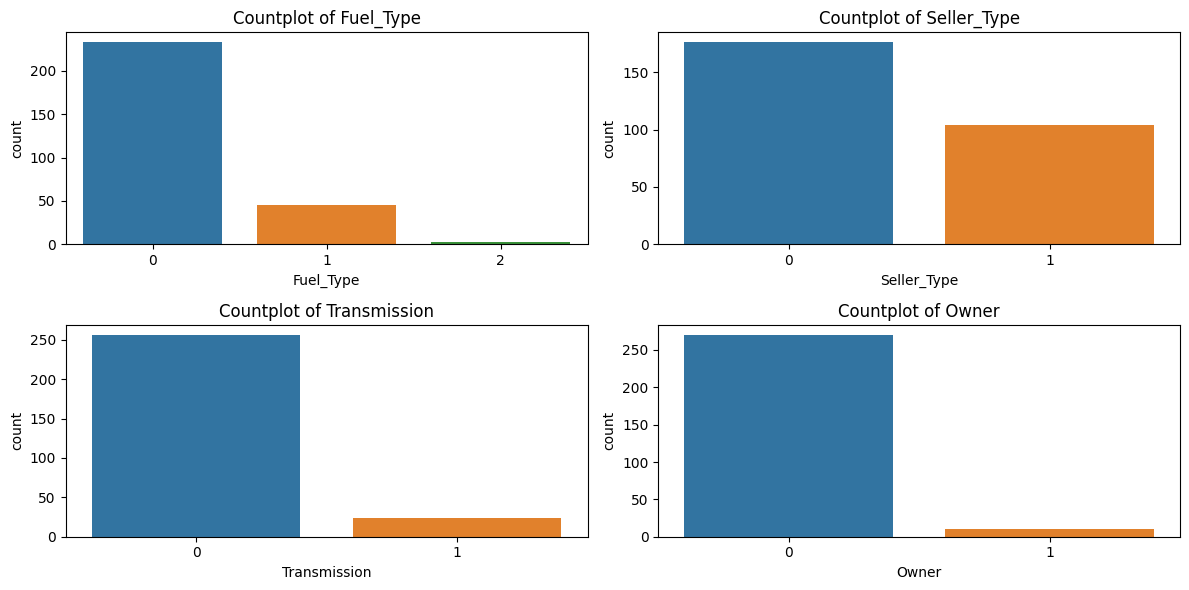

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x="Fuel_Type")
plt.title("Countplot of Fuel_Type")
plt.xlabel("Fuel_Type")
plt.subplot(2, 2, 2)
sns.countplot(data=df, x="Selling_type")
plt.title("Countplot of Seller_Type")
plt.xlabel("Seller_Type")
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Transmission")
plt.title("Countplot of Transmission")
plt.xlabel("Transmission")
plt.subplot(2, 2, 4)
sns.countplot(data=df, x="Owner")
plt.title("Countplot of Owner")
plt.xlabel("Owner")
plt.tight_layout()
plt.show()

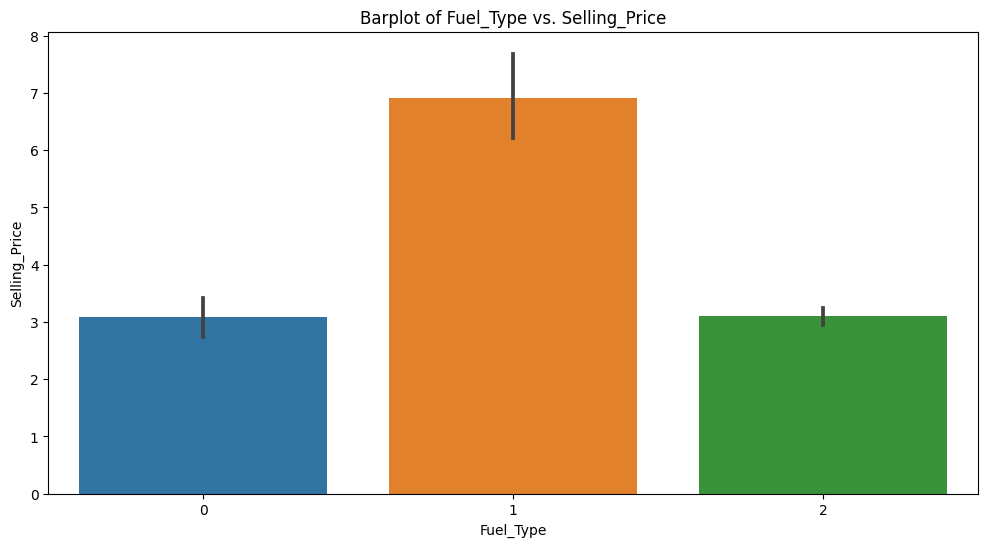

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Fuel_Type", y="Selling_Price")
plt.title("Barplot of Fuel_Type vs. Selling_Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.show()

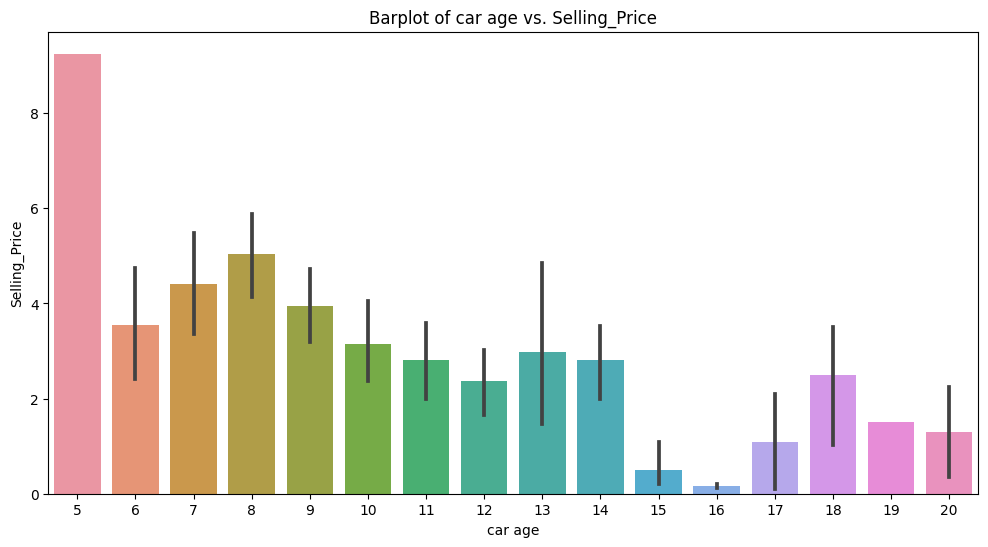

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Car_Age", y="Selling_Price")
plt.title("Barplot of car age vs. Selling_Price")
plt.xlabel("car age")
plt.ylabel("Selling_Price")
plt.show()

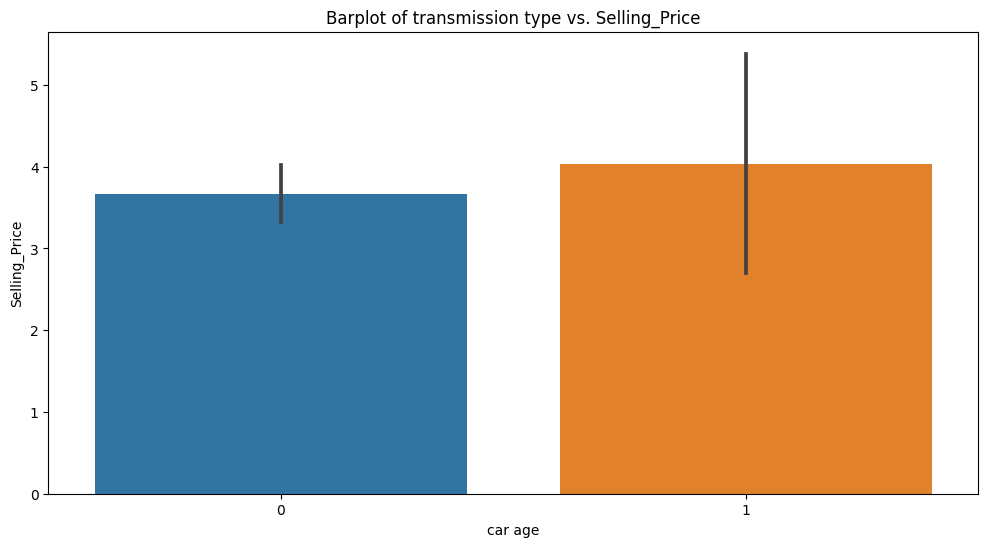

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Transmission", y="Selling_Price")
plt.title("Barplot of transmission type vs. Selling_Price")
plt.xlabel("car age")
plt.ylabel("Selling_Price")
plt.show()

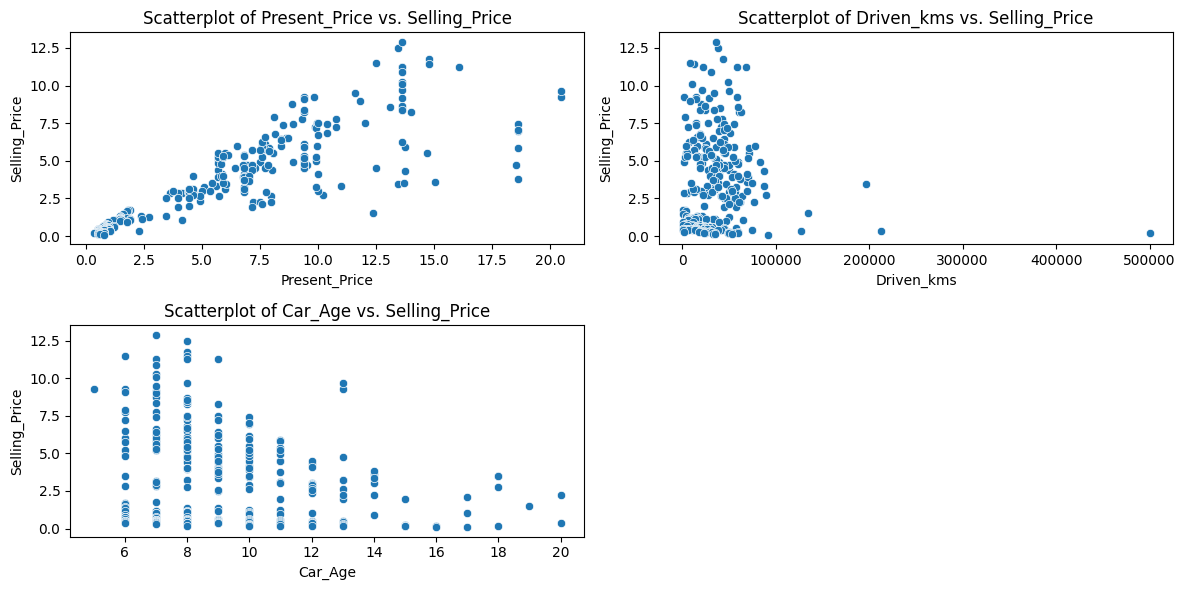

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="Present_Price", y="Selling_Price")
plt.title("Scatterplot of Present_Price vs. Selling_Price")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="Driven_kms", y="Selling_Price")
plt.title("Scatterplot of Driven_kms vs. Selling_Price")
plt.xlabel("Driven_kms")
plt.ylabel("Selling_Price")
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="Car_Age", y="Selling_Price")
plt.title("Scatterplot of Car_Age vs. Selling_Price")
plt.xlabel("Car_Age")
plt.ylabel("Selling_Price")
plt.tight_layout()
plt.show()






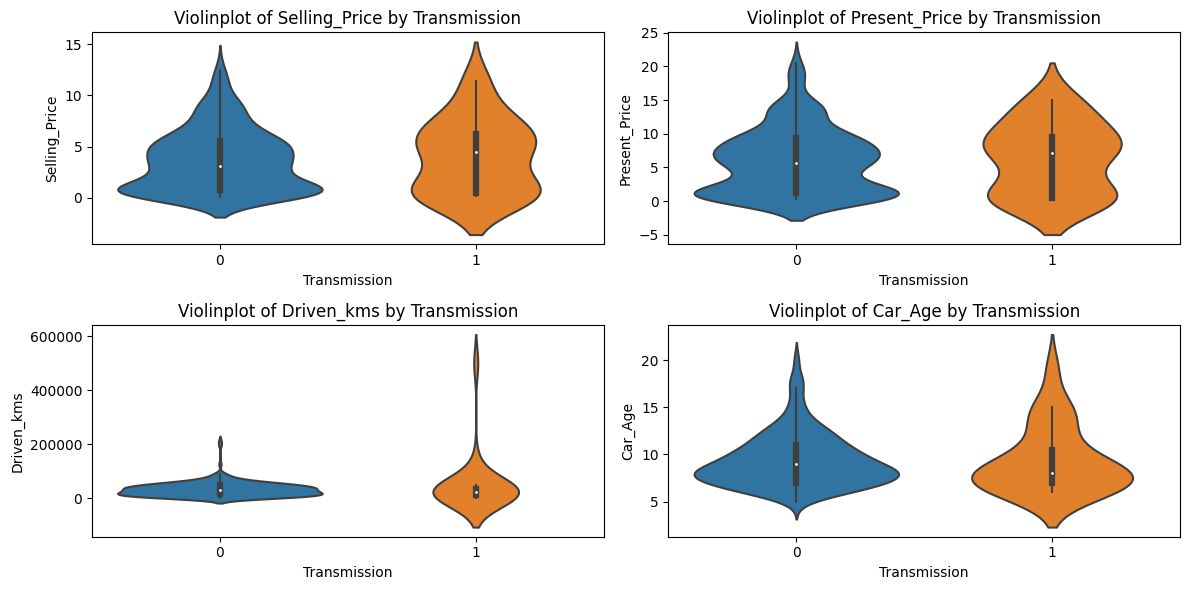

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x="Transmission", y="Selling_Price")
plt.title("Violinplot of Selling_Price by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Selling_Price")
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x="Transmission", y="Present_Price")
plt.title("Violinplot of Present_Price by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Present_Price")
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x="Transmission", y="Driven_kms")
plt.title("Violinplot of Driven_kms by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Driven_kms")
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x="Transmission", y="Car_Age")
plt.title("Violinplot of Car_Age by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Car_Age")
plt.tight_layout()
plt.show()







In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [35]:
x_train.shape,x_test.shape

((224, 8), (56, 8))

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()

In [39]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
from sklearn.metrics import mean_squared_error # find other metrics for regression

In [43]:
print(f'Lr: {mean_squared_error(y_test,lr.predict(x_test))}')
print(f'RFr: {mean_squared_error(y_test,rfr.predict(x_test))}')
print(f'dtr: {mean_squared_error(y_test,dtr.predict(x_test))}')

Lr: 1.9085815482028294
RFr: 0.8669557235714288
dtr: 1.5467375
